# EIF-203 Estructuras discretas para informática

# Investigación algoritmo de Kruskal

## Isaac Fabián Palma Medina 1-1865-0422

## NRC 41713

<center>Available since 13/06/22 at 13:05, not publicly listed on host</center>

***

# Noción

- **El algoritmo de Kruskal** es usado en la tarea de encontrar el *minimum spanning tree* (MST) de un grafo (no dirigido) conectado.<sup>[1][3][11][12]</sup>
- Un MST se trata de un subconjunto (conectado) de todos los vértices de un grafo, relacionados por medio arcos cuya **suma de pesos debe ser la menor posible**.<sup>[3][7]</sup>
- El algoritmo toma su nombre de Joseph Kruskal (matemático y estadístico estadounidense), y fue publicado en 1956.<sup>[3]</sup>
- Se trata de un algoritmo greedy.<sup>[11]</sup>

***

# Pasos generales

1. Primeramente, los pesos de los arcos del grafo son ordenados de manera **ascendente**, visitando cada par de vértices y el arco que los conecta.<sup>[1][6][12][14]</sup>
2. Seguidamente se visualizan (escriben) los **vértices sin sus arcos**.<sup>[1][6]</sup>
3. Finalmente, son añadidos los arcos según el orden en el que fueron escritos, además de verificar que **no se creen ciclos** (si un arco generara un ciclo este se descarta y se continua con el siguiente), hasta conseguir un grafo conectado.<sup>[1][6][14]</sup> Es importante denotar que para la cantidad de vértices (|V|), son necesarios un máximo de |V| -  1 arcos.

Bajo el proceso anterior la suma del peso de los arcos será la mínima posible, llegando a un MST.<sup>[7]</sup>

## Sobre el paso 3 y la generación de ciclos

Al tratar de añadir nuevos arcos al grafo se podrían generar **ciclos indeseados**, dicho problema puede ser detectado gracias al algoritmo *Union-Find*.  El algoritmo puede ser separado, por un lado una parte de búsqueda (*find*), encargada de determinar si los **elementos del arco a incluir se encuentran en el mismo subconjunto** (eso se desea evitar).<sup>[5][6][12]</sup>

Además, de la parte encargada de la unión (*union*) de nuevos subconjuntos, dando lugar a uno nuevo.<sup>[5]</sup>

***

# Ejemplo ilustrativo

## Paso 1

<center><img src="https://i.imgur.com/iJOgb7L.png" width=""/></center>

## Paso 2 y 3

<center><img src="https://i.imgur.com/imdzITY.png" width=""/></center>

## Paso 2 y 3

<center><img src="https://i.imgur.com/VK8Lwph.png" width=""/></center>

## Final

<center><img src="https://i.imgur.com/BzOagMd.png" width=""/></center>

***

# Tiempo de corrida

El análisis de tiempo puede ser logrado mediante la separación de la noción del algoritmo en partes, se identifica el ordenamiento del conjunto de arcos (por peso) así como la constante llamada a Union-Find, para verificar si un nodo ya pertenece a un cierto subgrafo. Las implementaciones de Union-Find son varias pero la lógica es la misma, y se apela a la hecho de que podría existir de una manera previa de llegar entre los nodos (pertenencia a otro subgrafo, según un padre).<sup>[4][6][12]</sup>

En cuanto al tiempo de corrida del ordenamiento, tomando por ejemplo a la función sorted de Python este una complejidad de *O(nlog(n))*, esto debido a la implementación “en el fondo” de un algoritmo denominado Timsort, cuyo tiempo en el peor caso es el mencionado. Lo anterior puede ser una manera de ordenar un conjunto, en este caso el conjunto sería el de los pesos de los arcos.<sup>[4][8]</sup>

En cuanto a la parte del Union-Find se visita la bibliografía sobre las disjoint-set data structures, para este caso se implementan determinadas operaciones las cuales permiten el control sobre conjuntos, en especial la posibilidad de fusionar conjuntos (union y creación de un nuevo set) y de averiguar si dos elementos pertenecen al mismo conjunto (find), bajo el resultado de lo anterior se da la lógica ya expuesta; estas verificaciones tienen una complejidad en el peor caso de *O(n)*.<sup>[5]</sup>

Bajo lo anterior y tomando en cuenta que los tiempos son *O(nlog(n))* y *O(n)*, se puede decir:

<center><i>T<sub>Kruskal</sub> = O(nlog(n)) + O(n) ⇒ f<sub>1</sub> + f<sub>2</sub> ~O(max(f<sub>1</sub>,f<sub>2</sub>))</i></center>

<center><i>T<sub>Kruskal</sub> = O(max(O(nlog(n)),O(n))), por teorema de suma</i></center>

<center><i>T<sub>Kruskal</sub> = O(nlog(n)), siendo n el número de vértices</i></center>

***

# Código en Python (test)

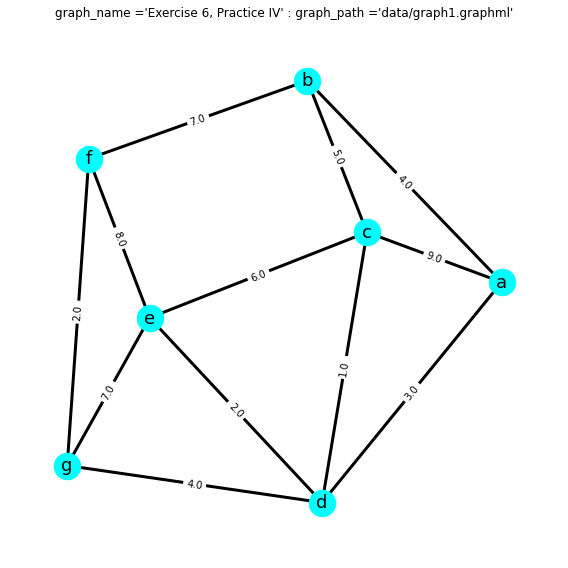

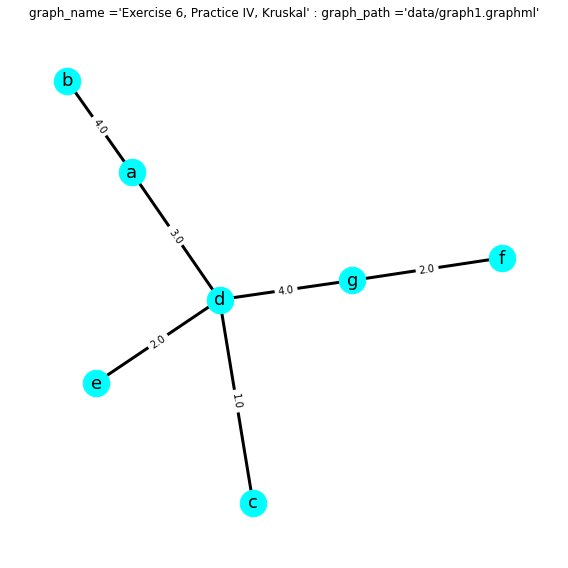

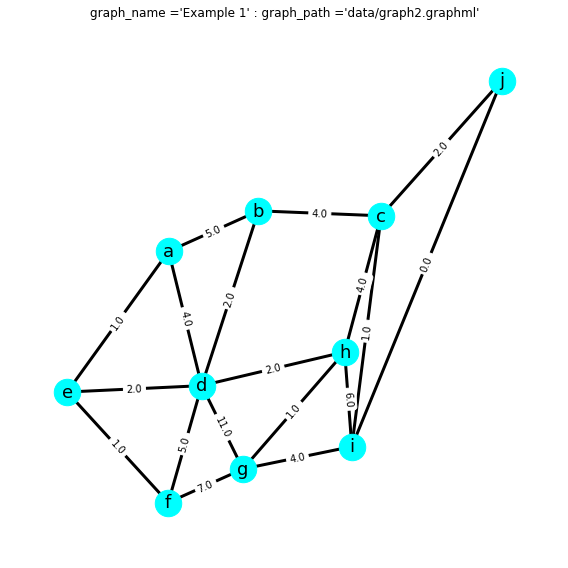

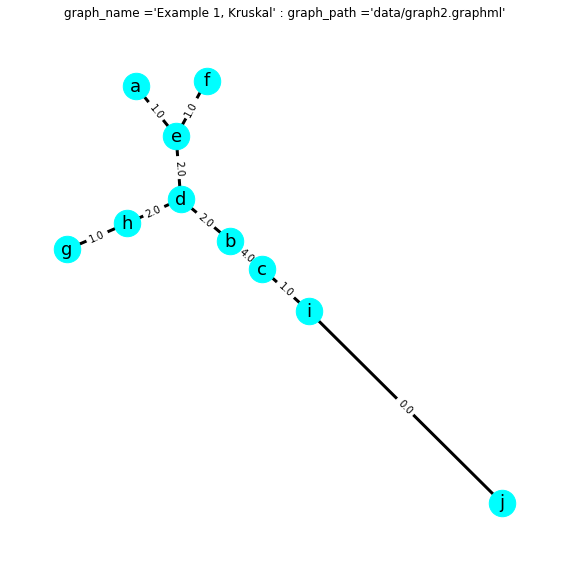

In [2]:
# -*- coding: utf-8 -*-
"""
Isaac F. Palma Medina
ID: 1-1865-0422
Docente: Carlos Loría Saénz
NRC: 41713 1pm
"""
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx

def draw_weighted_graph(G, graph_name:str="Test", graph_path:str="None"):
    fig = plt.figure(graph_name, figsize = (8, 8))
    plt.title(f"{graph_name =} : {graph_path =}", fontdict = {"fontsize" : 12})
    pos = nx.spring_layout(G, seed = 7)
    nx.draw_networkx_nodes(G, pos, node_size = 700, node_color = "cyan")
    nx.draw_networkx_edges(G, pos, edgelist = G.edges(), width = 3)
    """
    # Función para mostrar un grafo con pesos. 
    Enlaces:
    https://networkx.org/documentation/stable/auto_examples/drawing/plot_weighted_graph.html
    https://stackoverflow.com/questions/47094949/labeling-edges-in-networkx
    """
    nx.draw_networkx_labels(G, pos, font_size = 18)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels)
    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

def my_kruskal(G):
    """
    Los nodos son ordenados según su peso.
    sorted: ordena los elementos de una lista según un parámetro.
    G.edges(data = True): llama al conjunto de nodos acompañados de su peso (debido a "data = True").
    La "key" es igualada a una función lambda, dicha función llamará de cada nodo su peso,
    el resultado de esta operación ayudará a "sorted" a ordenar el diccionario. 
    Se hace uso de z[2] para acceder al segundo elemento (data) de cada nodo.
    Enlaces:
    https://borjauria.es/que-son-y-como-utilizar-lambdas-en-python-4d1d168e2f90
    https://towardsdatascience.com/sorting-a-dictionary-in-python-4280451e1637
    https://stackoverflow.com/questions/52551033/bubble-sorting-in-dictionary-in-python
    """
    sorted_edges = sorted(G.edges(data = True), key = lambda z: z[2].get('weight', 1))
    
    aux = nx.Graph() # Se crea un grafo auxiliar para alojar la respuesta.
    aux.add_nodes_from(G.nodes())
    for i in range(len(sorted_edges)):
        if nx.is_simple_path(aux, [sorted_edges[i][0], sorted_edges[i][1]]) == False: 
            try: # Se verifica si existe un camino previo entre dos nodos.
                nx.shortest_path(aux, sorted_edges[i][0], sorted_edges[i][1]) 
                # Si existiese no se añade ya que crearía un ciclo.
            except nx.NetworkXNoPath:
                aux.add_edge(sorted_edges[i][0], sorted_edges[i][1], weight=(sorted_edges[i][2]).get('weight', 1)) 
                # Si no existe, se añade, y se van haciendo las uniones entre las distintas componentes.
                """
                Enlaces:
                https://www.baeldung.com/cs/check-if-two-nodes-are-connected
                https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html
                """
    return aux # Se devuelve el nuevo grafo.

g1_path = "data/graph1.graphml"
graph1 = nx.read_graphml(g1_path)
draw_weighted_graph(graph1, "Exercise 6, Practice IV", g1_path)
draw_weighted_graph(my_kruskal(graph1), "Exercise 6, Practice IV, Kruskal", g1_path)

g2_path = "data/graph2.graphml"
graph2 = nx.read_graphml(g2_path)
draw_weighted_graph(graph2, "Example 1", g2_path)
draw_weighted_graph(my_kruskal(graph2), "Example 1, Kruskal", g2_path)

# Referencias

1. Bari, A. (2018, 9 febrero). 3.5 Prims and Kruskals Algorithms - Greedy Method. YouTube. https://www.youtube.com/watch?v=4ZlRH0eK-qQ
2. Chaudhary, T. (2018, 28 septiembre). Bubble sorting in dictionary in python. Stack Overflow. https://stackoverflow.com/questions/52551033/bubble-sorting-in-dictionary-in-python
3. Colaboradores de Wikipedia. (2020, 16 noviembre). Algoritmo de Kruskal. Wikipedia, la enciclopedia libre. https://es.wikipedia.org/w/index.php?title=Algoritmo_de_Kruskal&oldid=130982430
4. Colaboradores de Wikipedia. (2022a, mayo 27). Timsort. Wikipedia. https://en.wikipedia.org/wiki/Timsort
5. Colaboradores de Wikipedia. (2022b, junio 5). Disjoint-set data structure. Wikipedia. https://en.wikipedia.org/wiki/Disjoint-set_data_structure
6. Fiset, W. (2017, 8 abril). Union Find Kruskal’s Algorithm. YouTube. https://www.youtube.com/watch?v=JZBQLXgSGfs
7. HackerEarth. (2016, 25 abril). Minimum Spanning Tree Tutorials & Notes | Algorithms. https://www.hackerearth.com/practice/algorithms/graphs/minimum-spanning-tree/tutorial/
8. Martineau. (2013, 21 enero). What is the complexity of the sorted() function? Stack Overflow. https://stackoverflow.com/questions/14434490/what-is-the-complexity-of-the-sorted-function
9. Matalka, L. (2021, 22 diciembre). Sorting a Dictionary in Python - Towards Data Science. Medium. https://towardsdatascience.com/sorting-a-dictionary-in-python-4280451e1637
10. NetworkX. (2022). Shortest_path — documentation. https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html
11. Scanftree.com. (2022). Kruskal’s algorithm. https://scanftree.com/Data_Structure/kruskal’s-algorithm
12. Sedgewick, R., & Wayne, K. (2021). Algorithms. Algorithms, 4th Edition. https://algs4.cs.princeton.edu/home/
13. Sryheni, S. (2020, 19 octubre). Determine Whether Two Nodes in a Graph Are Connected. Baeldung on Computer Science. https://www.baeldung.com/cs/check-if-two-nodes-are-connected
14. Universitat Politècnica de València. (2013, 19 febrero). S4.4- Algoritmo de Kruskal | | UPV. YouTube. https://www.youtube.com/watch?v=YHzllcQpEdA
15. Uría, B. (2022, 30 marzo). Qué son y cómo utilizar Lambdas en Python. Medium. https://borjauria.es/que-son-y-como-utilizar-lambdas-en-python-4d1d168e2f90

<center><sub><sup>Hosted on GitHub Pages @ https://isaac-palmed.xyz/</sup></sub></center>

<center><sub><sup>Created using Jupyter Notebook, translated to HTML by using <code>jupyter nbconvert --to html .\kruskal.ipynb</code> on Visual Studio Code v1.68</sup></sub></center>

<center><sub><sup>Declaro de manera jurada que este trabajo fue elaborado por mi persona de manera estrictamente individual y que las fuentes usadas son las declaradas en la lámina de referencias, las cuales sirvieron de  base pero no fueron usadas como copia literal.</sup></sub></center>